# Анализ данных по расходованию бюджета

Доступен тестовый реестр командировок сотрудников Сбербанка за 4 месяца.

Задачи:
- Провести анализ данных по расходованию бюджета в различных кластерах (территорий, подразделений, целей, направлений и т.д.)
- Дать характеристику поездок выявленных кластеров.

## Подготовка данных

In [1]:
#Импорт библиотек
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy import stats as st
import math as mth
from plotly import graph_objects as go
import statistics
from scipy.stats import skew, mode

In [2]:
data=pd.read_excel('trips_test_dataset.xlsx')
data.head()

,Код территории,Финансовый год,Квартал,Месяц,Код подразделения,Бюджет,Корректировки,Бюджет с учетом корректировок,Свободный остаток бюджета,Факт,...,Комментарий 2,Пользователь,Должность,Дата начала,Дата окончания,Тип приказа,Номер приказа,Дата приказа,Место назначения,Цель командировки
0,1300,2023,2,4,1300L00122,0,0,0,0,2776.50,...,Купе / 71986850087672,User 5,Начальник отдела,2023-03-20,2023-03-20,Приказ о командировании: изменение,0317/10-ПК,2023-03-17,Российская Федерация г Москва,Встреча с руководством территориальных банков
1,1300,2023,2,4,1300L00122,0,0,0,0,3873.90,...,Купе / 71986850085874,User 5,Начальник отдела,2023-03-20,2023-03-20,Приказ о командировании: изменение,0317/10-ПК,2023-03-17,Российская Федерация г Москва,Встреча с руководством территориальных банков
2,1300,2023,2,4,1300L00122,0,0,0,0,95.83,...,NaN,User 5,Начальник отдела,2023-03-20,2023-03-20,Приказ о командировании: изменение,0317/10-ПК,2023-03-17,Российская Федерация г Москва,Встреча с руководством территориальных банков
3,1300,2023,2,4,1300L00122,0,0,0,0,95.83,...,NaN,User 5,Начальник отдела,2023-03-20,2023-03-20,Приказ о командировании: изменение,0317/10-ПК,2023-03-17,Российская Федерация г Москва,Встреча с руководством территориальных банков
4,1300,2023,2,4,1300L00122,0,0,0,0,241.67,...,NaN,User 5,Начальник отдела,2023-03-20,2023-03-20,Приказ о командировании: изменение,0317/10-ПК,2023-03-17,Российская Федерация г Москва,Встреча с руководством территориальных банков


In [3]:
#Проверка типа данных и проверка пропущенных значений в столбцах
data.info()
data.isna().mean()*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20984 entries, 0 to 20983
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Код территории                 20984 non-null  int64         
 1   Финансовый год                 20984 non-null  int64         
 2   Квартал                        20984 non-null  int64         
 3   Месяц                          20984 non-null  int64         
 4   Код подразделения              20984 non-null  object        
 5   Бюджет                         20984 non-null  int64         
 6   Корректировки                  20984 non-null  int64         
 7   Бюджет с учетом корректировок  20984 non-null  int64         
 8   Свободный остаток бюджета      20984 non-null  int64         
 9   Факт                           20984 non-null  float64       
 10  Зарезервировано                20984 non-null  float64       
 11  Тип расходов   

Код территории                    0.000000
Финансовый год                    0.000000
Квартал                           0.000000
Месяц                             0.000000
Код подразделения                 0.000000
Бюджет                            0.000000
Корректировки                     0.000000
Бюджет с учетом корректировок     0.000000
Свободный остаток бюджета         0.000000
Факт                              0.000000
Зарезервировано                   0.000000
Тип расходов                      0.000000
Вид командировочных расходов     12.719215
Комментарий 1                    48.246283
Комментарий 2                    78.126191
Пользователь                      0.000000
Должность                         0.681472
Дата начала                       0.000000
Дата окончания                    0.000000
Тип приказа                       0.000000
Номер приказа                     0.000000
Дата приказа                      0.000000
Место назначения                  0.000000
Цель команд

In [4]:
data.describe()

,Код территории,Финансовый год,Квартал,Месяц,Бюджет,Корректировки,Бюджет с учетом корректировок,Свободный остаток бюджета,Факт,Зарезервировано
count,20984.000000,20984.0,20984.000000,20984.00000,20984.0,20984.0,20984.0,20984.0,20984.000000,20984.000000
mean,6199.018300,2023.0,1.440574,3.16708,0.0,0.0,0.0,0.0,2831.991307,772.110579
std,2984.536389,0.0,0.502289,0.99793,0.0,0.0,0.0,0.0,8069.766491,4791.946878
min,1300.000000,2023.0,1.000000,1.00000,0.0,0.0,0.0,0.0,-92345.690000,0.000000
25%,4200.000000,2023.0,1.000000,2.00000,0.0,0.0,0.0,0.0,241.670000,0.000000
50%,5400.000000,2023.0,1.000000,3.00000,0.0,0.0,0.0,0.0,1000.000000,0.000000
75%,9900.000000,2023.0,2.000000,4.00000,0.0,0.0,0.0,0.0,2731.085000,0.000000
max,9900.000000,2023.0,3.000000,8.00000,0.0,0.0,0.0,0.0,412162.330000,231258.900000


In [5]:
#Проверка на явные дубликаты
data.duplicated().sum()

2243

In [6]:
#Удаление явных дубликатов
data= data.drop_duplicates()
data.duplicated().sum()

0

In [7]:
#Убирем пустые данные по 5-8 месяцам
data=data.query('Месяц<=4')

In [8]:
#Преобразование месяца в объект для удобства анализа
data['Месяц']=data['Месяц'].astype(str)

In [9]:
#Измение названия столбцов для удобства анализа
data=data.rename(columns={'Код территории':'Код_территории','Тип расходов':'Тип_расходов',
                          'Вид командировочных расходов':'Вид_командировочных_расходов',
                          'Цель командировки':'Цель_командировки'})

In [10]:
#Посмотрим какие территории есть
data['Код_территории'].sort_values().unique()

array([1300, 1600, 1800, 3800, 4000, 4200, 4400, 5200, 5400, 5500, 7000,
       9900])

In [11]:
#Преобразование кода территорий в объект для удобства анализа
data['Код_территории']=data['Код_территории'].astype(str)

In [12]:
#Посмотрим какие типы расходов есть
data['Тип_расходов'].sort_values().unique()

array(['Найм жилья за рубежом (оплата связанных услуг)',
       'Найм жилья, РФ (оплата связанных услуг)',
       'Прочие расходы на командирование в России (оплата связ.услу)',
       'Прочие расходы на командирование за рубеж (оплата связ.услу)',
       'Суточные за рубеж', 'Суточные, РФ (оплата связанных услуг)',
       'Трансп. расходы за рубеж',
       'Трансп. расходы, РФ (оплата связанных услуг)'], dtype=object)

In [13]:
#Для удобства были изменены названия в столбце Тип_расходов
def name_costs(Тип_расходов):
    if Тип_расходов == 'Найм жилья за рубежом (оплата связанных услуг)':
        return 'Найм жилья'
    if Тип_расходов == 'Найм жилья, РФ (оплата связанных услуг)':
        return 'Найм жилья'
    if Тип_расходов == 'Прочие расходы на командирование в России (оплата связ.услу)':
        return 'Пр. расходы на команд-ие'
    if Тип_расходов == 'Прочие расходы на командирование за рубеж (оплата связ.услу)':
        return 'Пр. расходы на команд-ие'
    if Тип_расходов == 'Суточные, РФ (оплата связанных услуг)':
        return 'Суточные'
    if Тип_расходов == 'Суточные за рубеж':
        return 'Суточные'
    if Тип_расходов == 'Трансп. расходы, РФ (оплата связанных услуг)':
        return 'Трансп. расходы'
    if Тип_расходов == 'Трансп. расходы за рубеж':
        return 'Трансп. расходы'
    else:
        return Тип_расходов
data['Вид_расходов'] = data['Тип_расходов'].apply(name_costs)

In [14]:
#Проверка изменений
data['Вид_расходов'].sort_values().unique()

array(['Найм жилья', 'Пр. расходы на команд-ие', 'Суточные',
       'Трансп. расходы'], dtype=object)

In [15]:
#Создание нового столбца с видом расходов (расходы в РФ или за рубежом)
def costs(Тип_расходов):
    if Тип_расходов == 'Найм жилья за рубежом (оплата связанных услуг)':
        return 'За рубеж'
    if Тип_расходов == 'Найм жилья, РФ (оплата связанных услуг)':
        return 'РФ'
    if Тип_расходов == 'Прочие расходы на командирование в России (оплата связ.услу)':
        return 'РФ'
    if Тип_расходов == 'Прочие расходы на командирование за рубеж (оплата связ.услу)':
        return 'За рубеж'
    if Тип_расходов == 'Суточные, РФ (оплата связанных услуг)':
        return 'РФ'
    if Тип_расходов == 'Суточные за рубеж':
        return 'За рубеж'
    if Тип_расходов == 'Трансп. расходы, РФ (оплата связанных услуг)':
        return 'РФ'
    if Тип_расходов == 'Трансп. расходы за рубеж':
        return 'За рубеж'
    else:
        return Тип_расходов

data['Территория_расходов']=data['Тип_расходов'].apply(costs)

In [16]:
#Проверка изменений
data['Территория_расходов'].sort_values().unique()

array(['За рубеж', 'РФ'], dtype=object)

In [17]:
#Посмотрим какие виды расходов есть
data['Вид_командировочных_расходов'].sort_values().unique()

array(['Проезд Загран АК', 'Проезд Заграница', 'Проезд РФ АК',
       'Проезд Россия', 'Проезд Россия (корпкарта)',
       'Проживание Заграница', 'Проживание РФ',
       'Проживание РФ (корпкарта)', 'ПроживаниеЗагран АК',
       'ПроживаниеРоссия АК', 'Прочие АК', 'Прочие расходы РФ',
       'Сервисный сбор', 'Сервисный сбор АК', 'Суточные День Возвращения',
       'Суточные Заграница (сверхнорм)', 'Суточные Зарубеж',
       'Суточные РФ', 'Трансфер Заграница', 'Трансфер РФ',
       'Трансфер РФ АК', 'ТрансферЗаграница AK', nan], dtype=object)

In [18]:
#Посмотрим какие есть цели командировок
data['Цель_командировки'].sort_values().unique()

array(['Встреча с руководством территориальных банков',
       'Выполнение служебного задания по направлению "ВСП"',
       'Ежегодная бизнес-конференция ПАО Сбербанк',
       'Контроль за текущей деятельностью ДЗО',
       'Обучение в АНО ДПО «Корпоративный Университет Сбербанка»',
       'Оказание методологической помощи',
       'Проведение обучения (ДЛЯ ПРЕПОДАЮЩИХ)',
       'Проведение проверок функциональной деятельности',
       'Производственное совещание (Всероссийский турнир Сбербанка)',
       'Прохождение обучения Руководителями (ВЫСШЕГО звена)',
       'Прохождение обучения руководителями подразделений ЦА/ТБ/ПЦП',
       'Прохождение обучения специалистами массовых должностей',
       'Прохождение обучения специалистами немассовых должностей',
       'Участие в конференции/форуме/выставке',
       'Участие в переговорах (ВНЕШНИЕ КЛИЕНТЫ)',
       'Участие в производственном совещании (БЕЗ ВЫПЛАТЫ СУТОЧНЫХ)',
       'Участие в совещании (ВНУТРЕННИЕ КЛИЕНТЫ)',
       'Участи

In [19]:
#Создание нового столбца с целью командировок (обобщенное)
def purpose(Цель_командировки):
    if Цель_командировки == 'Встреча с руководством территориальных банков':
        return 'Встречи/переговоры/совещания'
    if Цель_командировки == 'Выполнение служебного задания по направлению "ВСП"':
        return 'Контроль/проверки/служебные задания'
    if Цель_командировки == 'Ежегодная бизнес-конференция ПАО Сбербанк':
        return 'Конференции/форумы/выставки/семинары'
    if Цель_командировки == 'Контроль за текущей деятельностью ДЗО':
        return 'Контроль/проверки/служебные задания'
    if Цель_командировки == 'Обучение в АНО ДПО «Корпоративный Университет Сбербанка»':
        return 'Обучение'
    if Цель_командировки == 'Оказание методологической помощи':
        return 'Оказание методологической помощи'
    if Цель_командировки == 'Проведение обучения (ДЛЯ ПРЕПОДАЮЩИХ)':
        return 'Обучение'
    if Цель_командировки == 'Проведение проверок функциональной деятельности':
        return 'Контроль/проверки/служебные задания'
    if Цель_командировки == 'Производственное совещание (Всероссийский турнир Сбербанка)':
        return 'Встречи/переговоры/совещания'
    if Цель_командировки == 'Прохождение обучения Руководителями (ВЫСШЕГО звена)':
        return 'Обучение'
    if Цель_командировки == 'Прохождение обучения руководителями подразделений ЦА/ТБ/ПЦП':
        return 'Обучение'
    if Цель_командировки == 'Прохождение обучения специалистами массовых должностей':
        return 'Обучение'
    if Цель_командировки == 'Прохождение обучения специалистами немассовых должностей':
        return 'Обучение'
    if Цель_командировки == 'Участие в конференции/форуме/выставке':
        return 'Конференции/форумы/выставки/семинары'
    if Цель_командировки == 'Участие в переговорах (ВНЕШНИЕ КЛИЕНТЫ)':
        return 'Встречи/переговоры/совещания'
    if Цель_командировки == 'Участие в производственном совещании (БЕЗ ВЫПЛАТЫ СУТОЧНЫХ)':
        return 'Встречи/переговоры/совещания'
    if Цель_командировки == 'Участие в совещании (ВНУТРЕННИЕ КЛИЕНТЫ)':
        return 'Встречи/переговоры/совещания'
    if Цель_командировки == 'Участие в стратегической региональной конференции ФБ':
        return 'Стратегические сессии/конференции'
    if Цель_командировки == 'Участие в стратегической сессии Правления Банка':
        return 'Стратегические сессии/конференции'
    if Цель_командировки == 'Участие в тематическом семинаре (БЕЗ ВЫПЛАТЫ СУТОЧНЫХ)':
        return 'Конференции/форумы/выставки/семинары'
    if Цель_командировки == 'Участие/проведение ГЕМБЫ':
        return 'Участие/проведение ГЕМБЫ'
    else:
        return Цель_командировки

data['Цель']=data['Цель_командировки'].apply(purpose)

In [20]:
#Проверка изменений
data['Цель'].sort_values().unique()

array(['Встречи/переговоры/совещания',
       'Контроль/проверки/служебные задания',
       'Конференции/форумы/выставки/семинары', 'Обучение',
       'Оказание методологической помощи',
       'Стратегические сессии/конференции', 'Участие/проведение ГЕМБЫ'],
      dtype=object)

- Отсутсвуют данные в столбцах: Бюджет,	Корректировки, Бюджет с учетом корректировок, Свободный остаток бюджета-заполнять их не будем, т.к. для этого нет информации
- Удалены явные дубликаты
- Изменены названия в некоторых столбцах для удобства
- Преобразован формат данных в коде территорий
- Созданы новые столбцы для дальнейшего анализа

## Анализ данных

### Анализ по территориям

In [21]:
#Сводная таблица расходов по территориям
code_ter=(data.pivot_table(index=['Код_территории'],values='Факт',aggfunc='sum')
              .sort_values(by='Факт',ascending=False).reset_index())
code_ter['share']=round(code_ter['Факт']/sum(data['Факт']),3)*100
code_ter

,Код_территории,Факт,share
0,9900,23640945.57,40.4
1,5200,5793057.08,9.9
2,1600,5404486.80,9.2
3,7000,4110310.81,7.0
4,4200,3644003.26,6.2
5,5500,3582241.02,6.1
6,5400,2755463.38,4.7
7,4400,2750191.24,4.7
8,4000,2504724.10,4.3
9,1800,2021219.77,3.5


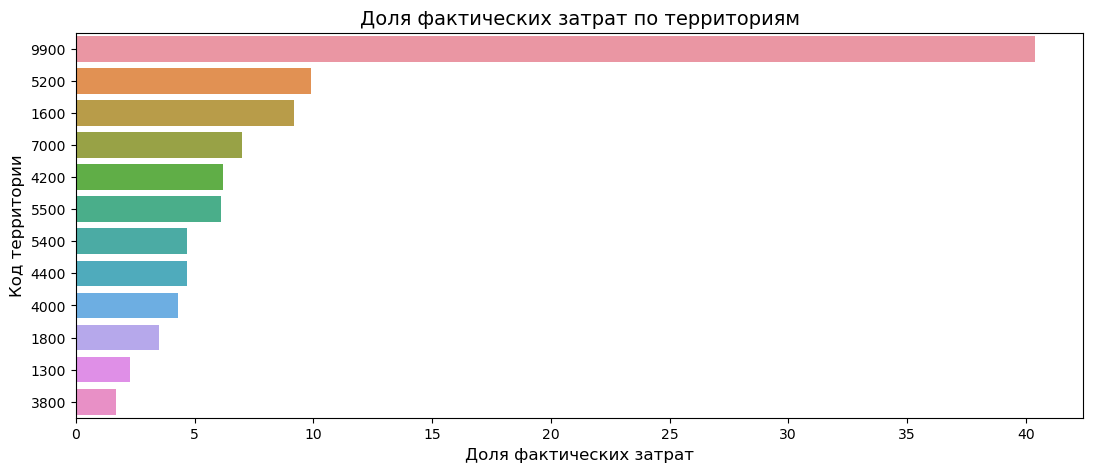

In [22]:
#Построим график по виду расходов
plt.subplots(1,figsize=(13,5))
ax=sns.barplot(y='Код_территории',x='share',data=code_ter) 
ax.axes.set_title('Доля фактических затрат по территориям', fontsize=14)
ax.set_ylabel('Код территории', fontsize=12)
ax.set_xlabel('Доля фактических затрат', fontsize=12);

Большая часть расходов 40,4% приходится на территорию 9900.

### Анализ по видам расходов

In [23]:
#Сводная таблица по виду расходов
type_costs1=(data.pivot_table(index=['Вид_расходов'],values='Факт',aggfunc='sum')
                .sort_values(by=['Факт'],ascending=False).reset_index())
type_costs1['share']=round(type_costs1['Факт']/sum(data['Факт']),3)*100
type_costs1

,Вид_расходов,Факт,share
0,Трансп. расходы,30957221.66,52.9
1,Найм жилья,16823354.51,28.7
2,Пр. расходы на команд-ие,5464062.68,9.3
3,Суточные,5298784.55,9.1


In [24]:
#Сводная таблица по виду расходов
type_costs=(data.pivot_table(index=['Вид_расходов','Территория_расходов'],values='Факт',aggfunc='sum')
                .sort_values(by=['Факт'],ascending=False).reset_index())
type_costs['share']=round(type_costs['Факт']/sum(data['Факт']),3)*100

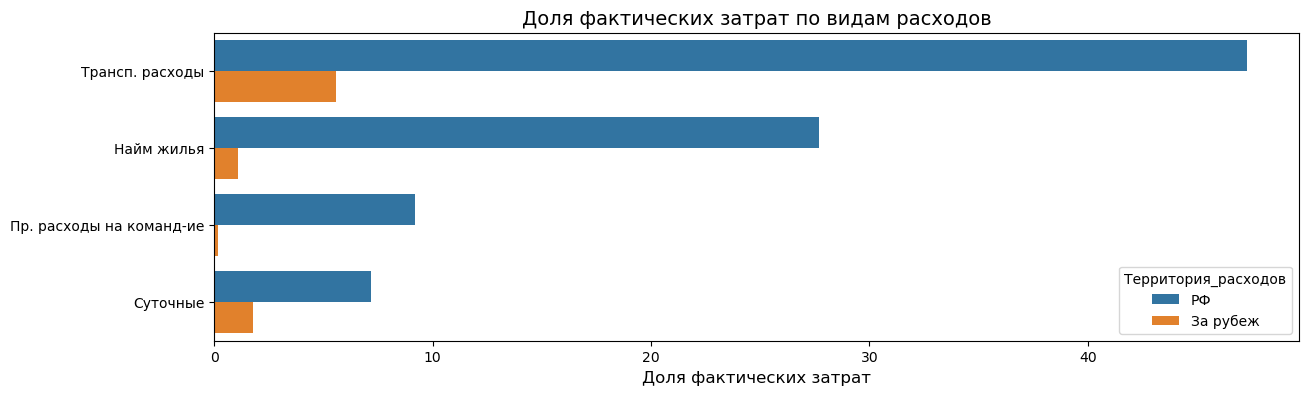

In [25]:
#Построим график по виду расходов
plt.subplots(1,figsize=(14,4))
ax=sns.barplot(x='share',y='Вид_расходов',hue='Территория_расходов',data=type_costs) 
ax.axes.set_title('Доля фактических затрат по видам расходов', fontsize=14)
ax.set_xlabel('Доля фактических затрат', fontsize=12)
ax.set_ylabel('', fontsize=14);

Большая часть расходов приходится на территорию РФ.

В общем (и в РФ и за рубежом) расходы распределены следующим образом:
- 52.9% - Транспортные расходы
- 28.7% - Найм жилья
- 9.3% - Прочие расходы на командирование
- 9.1% - Суточные

### Анализ по целям командировок

In [26]:
#Сводная таблица по целям командировок
costs_purpose=(data.pivot_table(index=['Цель'],values='Факт',aggfunc='sum')
                   .sort_values(by='Факт',ascending=False).reset_index())
costs_purpose['share']=round(costs_purpose['Факт']/sum(data['Факт']),3)*100
costs_purpose

,Цель,Факт,share
0,Встречи/переговоры/совещания,21110517.44,36.1
1,Участие/проведение ГЕМБЫ,17443185.95,29.8
2,Обучение,8819066.15,15.1
3,Конференции/форумы/выставки/семинары,4196099.60,7.2
4,Оказание методологической помощи,3887584.60,6.6
5,Стратегические сессии/конференции,2633794.37,4.5
6,Контроль/проверки/служебные задания,453175.29,0.8


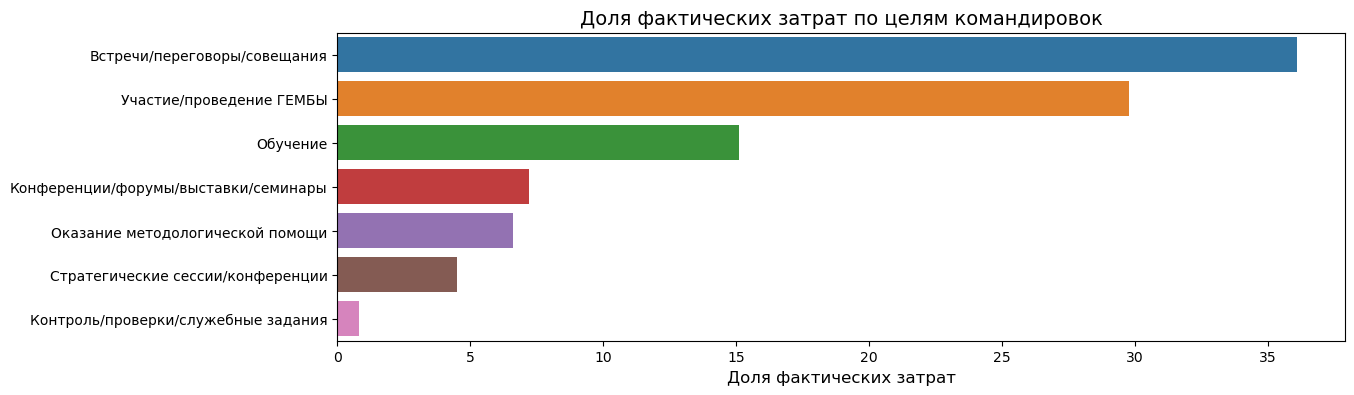

In [27]:
#Построим график по целям расходов
plt.subplots(1,figsize=(13,4))
ax=sns.barplot(y='Цель',x='share',data=costs_purpose) 
ax.axes.set_title('Доля фактических затрат по целям командировок', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_xlabel('Доля фактических затрат', fontsize=12);

В Топ-3 по целям командировок входят:
- Встречи/переговоры/совещания 36.1%
- Участие/проведение ГЕМБЫ 29.8%
- Обучение 15.1%

### Анализ по подразделениям

In [28]:
#Сводная таблица по коду подразделения
code=(data.pivot_table(index=['Код подразделения','Код_территории'],values='Факт',aggfunc='sum')
          .sort_values(by='Факт',ascending=False).reset_index())
code['share']=round(code['Факт']/sum(data['Факт']),3)*100
code.head(10)

,Код подразделения,Код_территории,Факт,share
0,9900L02300,9900,2586740.10,4.4
1,9900L39006,9900,2016441.76,3.4
2,9900L39003,9900,2000833.74,3.4
3,9900L39005,9900,2000524.89,3.4
4,9900K11000,9900,1793284.92,3.1
5,5200L00139,5200,1623535.55,2.8
6,9900K16000,9900,1358975.08,2.3
7,9900K18000,9900,1349177.90,2.3
8,7000L00532,7000,1328830.81,2.3
9,9900L02147,9900,1324294.73,2.3


In [29]:
code_top10=code.head(10)
code_top10['share'].sum()

29.700000000000003

Топ 10 подразделений занимает 29,7% расходов. Восемь из них это подразделения 9900 территории.

### Анализ территории 9900

In [30]:
#Проанализируем отдельно территорию 9900
cluster_9900=data.query('Код_территории=="9900"')

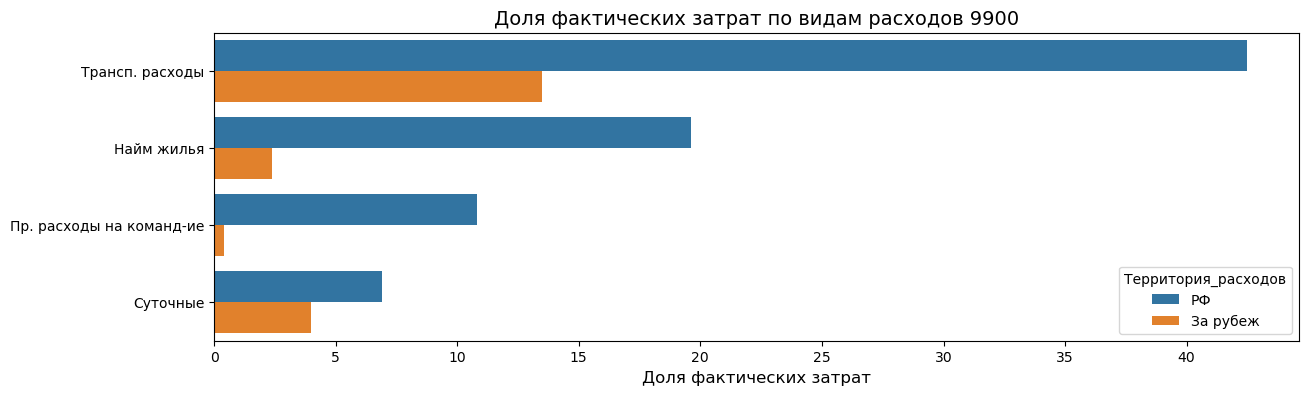

In [31]:
#Сводная таблица по виду расходов
type_costs_9900=(cluster_9900
                 .pivot_table(index=['Вид_расходов','Территория_расходов'],values='Факт',aggfunc='sum')
                 .sort_values(by=['Факт'],ascending=False).reset_index())
type_costs_9900['share']=round(type_costs_9900['Факт']/sum(cluster_9900['Факт']),3)*100
#Построим график по виду расходов
plt.subplots(1,figsize=(14,4))
ax=sns.barplot(x='share',y='Вид_расходов',hue='Территория_расходов',data=type_costs_9900) 
ax.axes.set_title('Доля фактических затрат по видам расходов 9900', fontsize=14)
ax.set_xlabel('Доля фактических затрат', fontsize=12)
ax.set_ylabel('', fontsize=14);

Распределение видов расходов на территории 9900 не имеет значительных различий от общей массы.

In [32]:
type_costs_9900['Факт'].sum()

23640945.570000004

In [33]:
#Сводная таблица по целям командировок
costs_purpose_9900=(cluster_9900.pivot_table(index=['Цель'],values='Факт',aggfunc='sum')
                                .sort_values(by='Факт',ascending=False).reset_index())
costs_purpose_9900['share']=round(costs_purpose_9900['Факт']/sum(cluster_9900['Факт']),3)*100
costs_purpose_9900

,Цель,Факт,share
0,Участие/проведение ГЕМБЫ,10632133.73,45.0
1,Встречи/переговоры/совещания,6989387.06,29.6
2,Оказание методологической помощи,2733452.43,11.6
3,Конференции/форумы/выставки/семинары,2179102.47,9.2
4,Обучение,944824.06,4.0
5,Контроль/проверки/служебные задания,111524.81,0.5
6,Стратегические сессии/конференции,50521.01,0.2


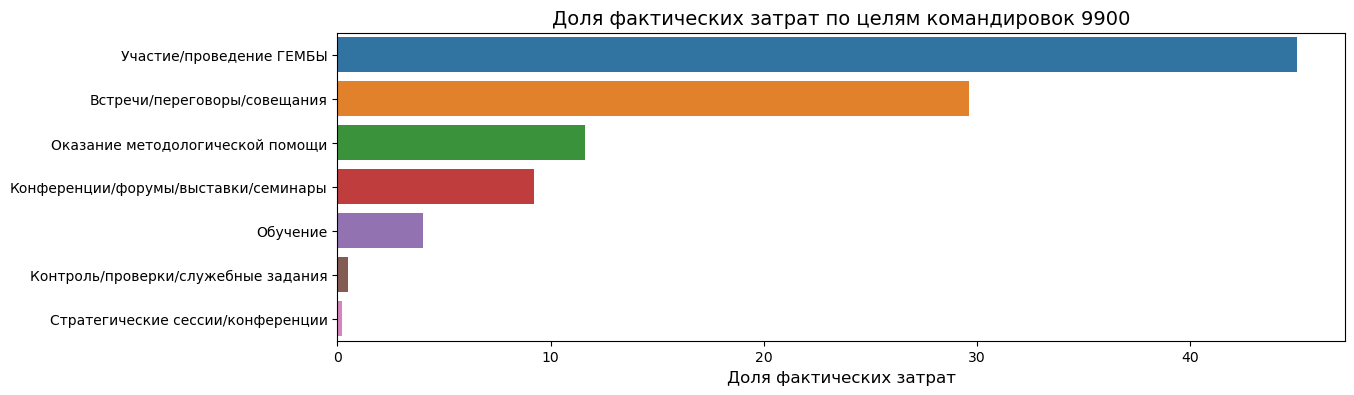

In [34]:
#Построим график по целям расходов
plt.subplots(1,figsize=(13,4))
ax=sns.barplot(y='Цель',x='share',data=costs_purpose_9900) 
ax.axes.set_title('Доля фактических затрат по целям командировок 9900', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_xlabel('Доля фактических затрат', fontsize=12);

В Топ-3 по целям командировок входят на территории 9900:
- Участие/проведение ГЕМБЫ 45.0%
- Встречи/переговоры/совещания 29.6%
- Оказание методологической помощи 11.6%

Порядок целей территории 9900 расходится от общего распределения.

In [35]:
#Создание сводной таблицы для составления основных хар-к территории
cluster9900=(cluster_9900.groupby('Код_территории')
                         .agg({'Факт':'mean','Цель_командировки':[pd.Series.mode],
                               'Должность':[pd.Series.mode],'Место назначения':[pd.Series.mode]})
                         .round(1).T)
cluster9900

,Код_территории,9900
Факт,mean,3787.4
Цель_командировки,mode,Участие/проведение ГЕМБЫ
Должность,mode,Руководитель направления
Место назначения,mode,Российская Федерация г Санкт-Петербург


Если составить усредненный портрет командировки с территории 9900, то:
- Командировку совершает руководитель направления
- Цель: участие/проведение Гембы
- Место: Санкт-Петербург
- Средний размер трат - 3787 рублей.

## Вывод

Была сделана предобработка данных:
- Проверка и удаление явные дубликаты
- Изменены названия в некоторых столбцах для удобства
- Преобразован формат данных в коде территорий
- Созданы новые столбцы для дальнейшего анализа

Анализ показал, что большая часть расходов 40,4% приходится на территорию 9900.

В общем (и в РФ и за рубежом) расходы распределены следующим образом:
- 52.9% - Транспортные расходы
- 28.7% - Найм жилья
- 9.3% - Прочие расходы на командирование
- 9.1% - Суточные

В Топ-3 по целям командировок входят:
- Встречи/переговоры/совещания 36.1%
- Участие/проведение ГЕМБЫ 29.8%
- Обучение 15.1%

Топ 10 подразделений занимает 29,7% расходов. Восемь из них это подразделения 9900 территории.

Был проведен отдельный анализ для территории 9900.
Распределение видов расходов на территории 9900 не имеет значительных различий от общей массы.

Порядок целей территории 9900 расходится от общего распределения. В Топ-3 по целям командировок входят на территории 9900:
- Участие/проведение ГЕМБЫ 45.0%
- Встречи/переговоры/совещания 29.6%
- Оказание методологической помощи 11.6%

Если составить усредненный портрет командировки с территории 9900, то:
- Командировку совершает руководитель направления
- Цель: участие/проведение Гембы
- Место: Санкт-Петербург
- Средний размер трат - 3787 рублей.